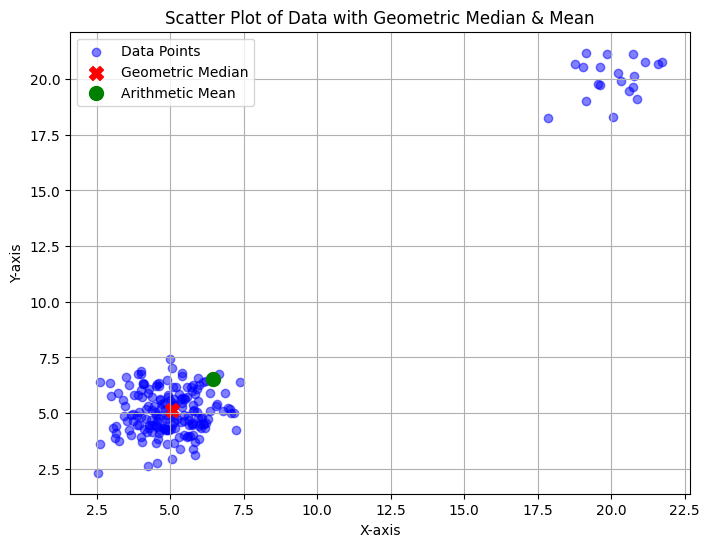

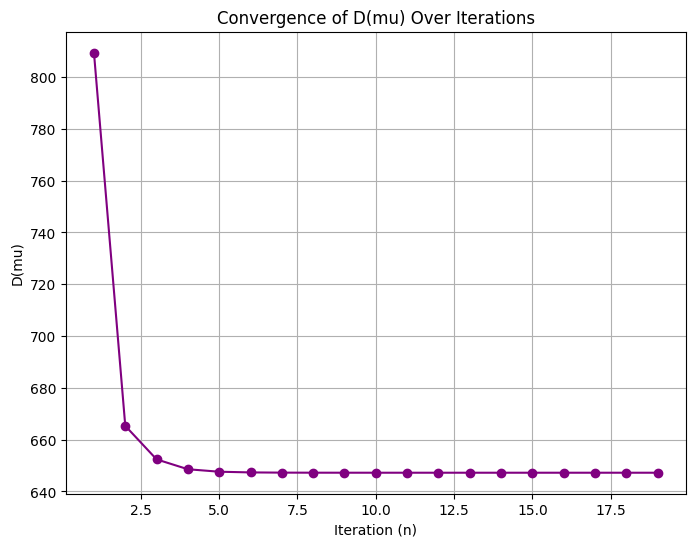

In [5]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# Path to the uploaded file in Google Colab
file_path = "/content/Data-for-Weiszfeld-Algorithm---1403-2.mat"
variable_name = "x"  # Name of the variable containing the data in the MAT file

# 1. Load data from the .mat file
def load_mat_data(file_path, variable_name):
    """ Function to read data from a MAT file """
    mat_data = scipy.io.loadmat(file_path)
    return mat_data[variable_name]

# 2. Weiszfeld Algorithm Implementation (Without Using Built-in Functions)
def geometric_median(X, max_iter=100, tol=1e-5):
    """ Compute the geometric median using the Weiszfeld algorithm """
    N, d = X.shape
    mu = np.mean(X, axis=0)  # Initial estimate: Arithmetic mean of the data
    D_values = []  # List to store the objective function D(mu) at each iteration

    for n in range(max_iter):
        distances = np.array([np.sqrt(np.sum((x - mu) ** 2)) for x in X])  # Compute distances
        nonzero = distances > tol  # Avoid division by zero

        if not np.any(nonzero):  # If all points coincide with the median
            return mu, D_values

        weights = 1 / distances[nonzero]
        mu_new = np.sum(X[nonzero] * weights[:, np.newaxis], axis=0) / np.sum(weights)

        # Compute the objective function D(mu)
        D_mu = np.sum([np.sqrt(np.sum((x - mu) ** 2)) for x in X])
        D_values.append(D_mu)

        if np.sqrt(np.sum((mu_new - mu) ** 2)) < tol:  # Stopping condition
            break

        mu = mu_new

    return mu, D_values

# 3. Load data from the file
X = load_mat_data(file_path, variable_name)

# 4. Run the algorithm and compute the geometric median
geometric_median_point, D_values = geometric_median(X)

# 5. Compute the arithmetic mean of the data
mean_point = np.mean(X, axis=0)

# 6. Scatter plot of the data with special points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label="Data Points", alpha=0.5, c='blue')
plt.scatter(geometric_median_point[0], geometric_median_point[1],
            color='red', marker='X', s=100, label="Geometric Median")
plt.scatter(mean_point[0], mean_point[1],
            color='green', marker='o', s=100, label="Arithmetic Mean")

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot of Data with Geometric Median & Mean")
plt.legend()
plt.grid()
plt.show()

# 7. Plot the objective function D(mu) over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(D_values) + 1), D_values, marker='o', linestyle='-', color='purple')
plt.xlabel("Iteration (n)")
plt.ylabel("D(mu)")
plt.title("Convergence of D(mu) Over Iterations")
plt.grid()
plt.show()
